In [64]:
path_train = 'wage_train.csv' # For Jupyter Notebook
path_test = 'wage_test.csv' # For Jupyter Notebook

#path_train = '/content/wage_train.csv'#For google Colab
#path_test = '/content/wage_test.csv'#For google Colab

#from google.colab import drive
#drive.mount('/content/drive/',force_remount=True)

# Imports, Carregamento dos Dados e Manipulações

## Imports

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,plot_confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

import xgboost as xgb


## Carregando os dados

In [66]:
path_train = 'wage_train.csv' # For Jupyter Notebook

wage_train = pd.read_csv(path_train,
                        index_col=0)

wage_train.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [67]:
wage_train.isnull().sum(axis = 0)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
yearly_wage       0
dtype: int64

Dados de treino foram carregados e não há valores nulos.

In [68]:
wage_test = pd.read_csv(path_test,
                        index_col=0)

wage_test.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [69]:
wage_test.isnull().sum(axis = 0)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

Dados de teste foram carregados e não há valores nulos.

## Exploração e Manipulações

Vou trabalhar explorando so dados de treino. Faço um plot de histogramas de cada um dos atributos para conhecer o dataset. 

In [70]:
wage_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Entrega**

*1 - Descreva graficamente os dados disponíveis, apresentando as principais estatísticas descritivas. Comente o porquê da escolha dessas estatísticas.*

Acima eu coloco o resultado do comando `describe`, que apresenta estatísticas básicas de média, desvio padrão e percentis. Isso só se aplica a atributos numéricos, então os atributos categóricos acabam ficando de fora.

Abaixo apresento histograma em que aparecem todos os atributos, inclusive os categóricos. É possível notar que as pessoas que possuem renda superior a 50K por ano tem tendência a serem:
 - ter entre 35 e 60 anos;
 - ter formação de bachelor ou acima;
 - ter mais de 7 anos de educação;
 - serem casadas;
 - trabalharem entre 40 e 60 horas por semana
 - algumas profissões são mais favorecida (executivo, especialista);



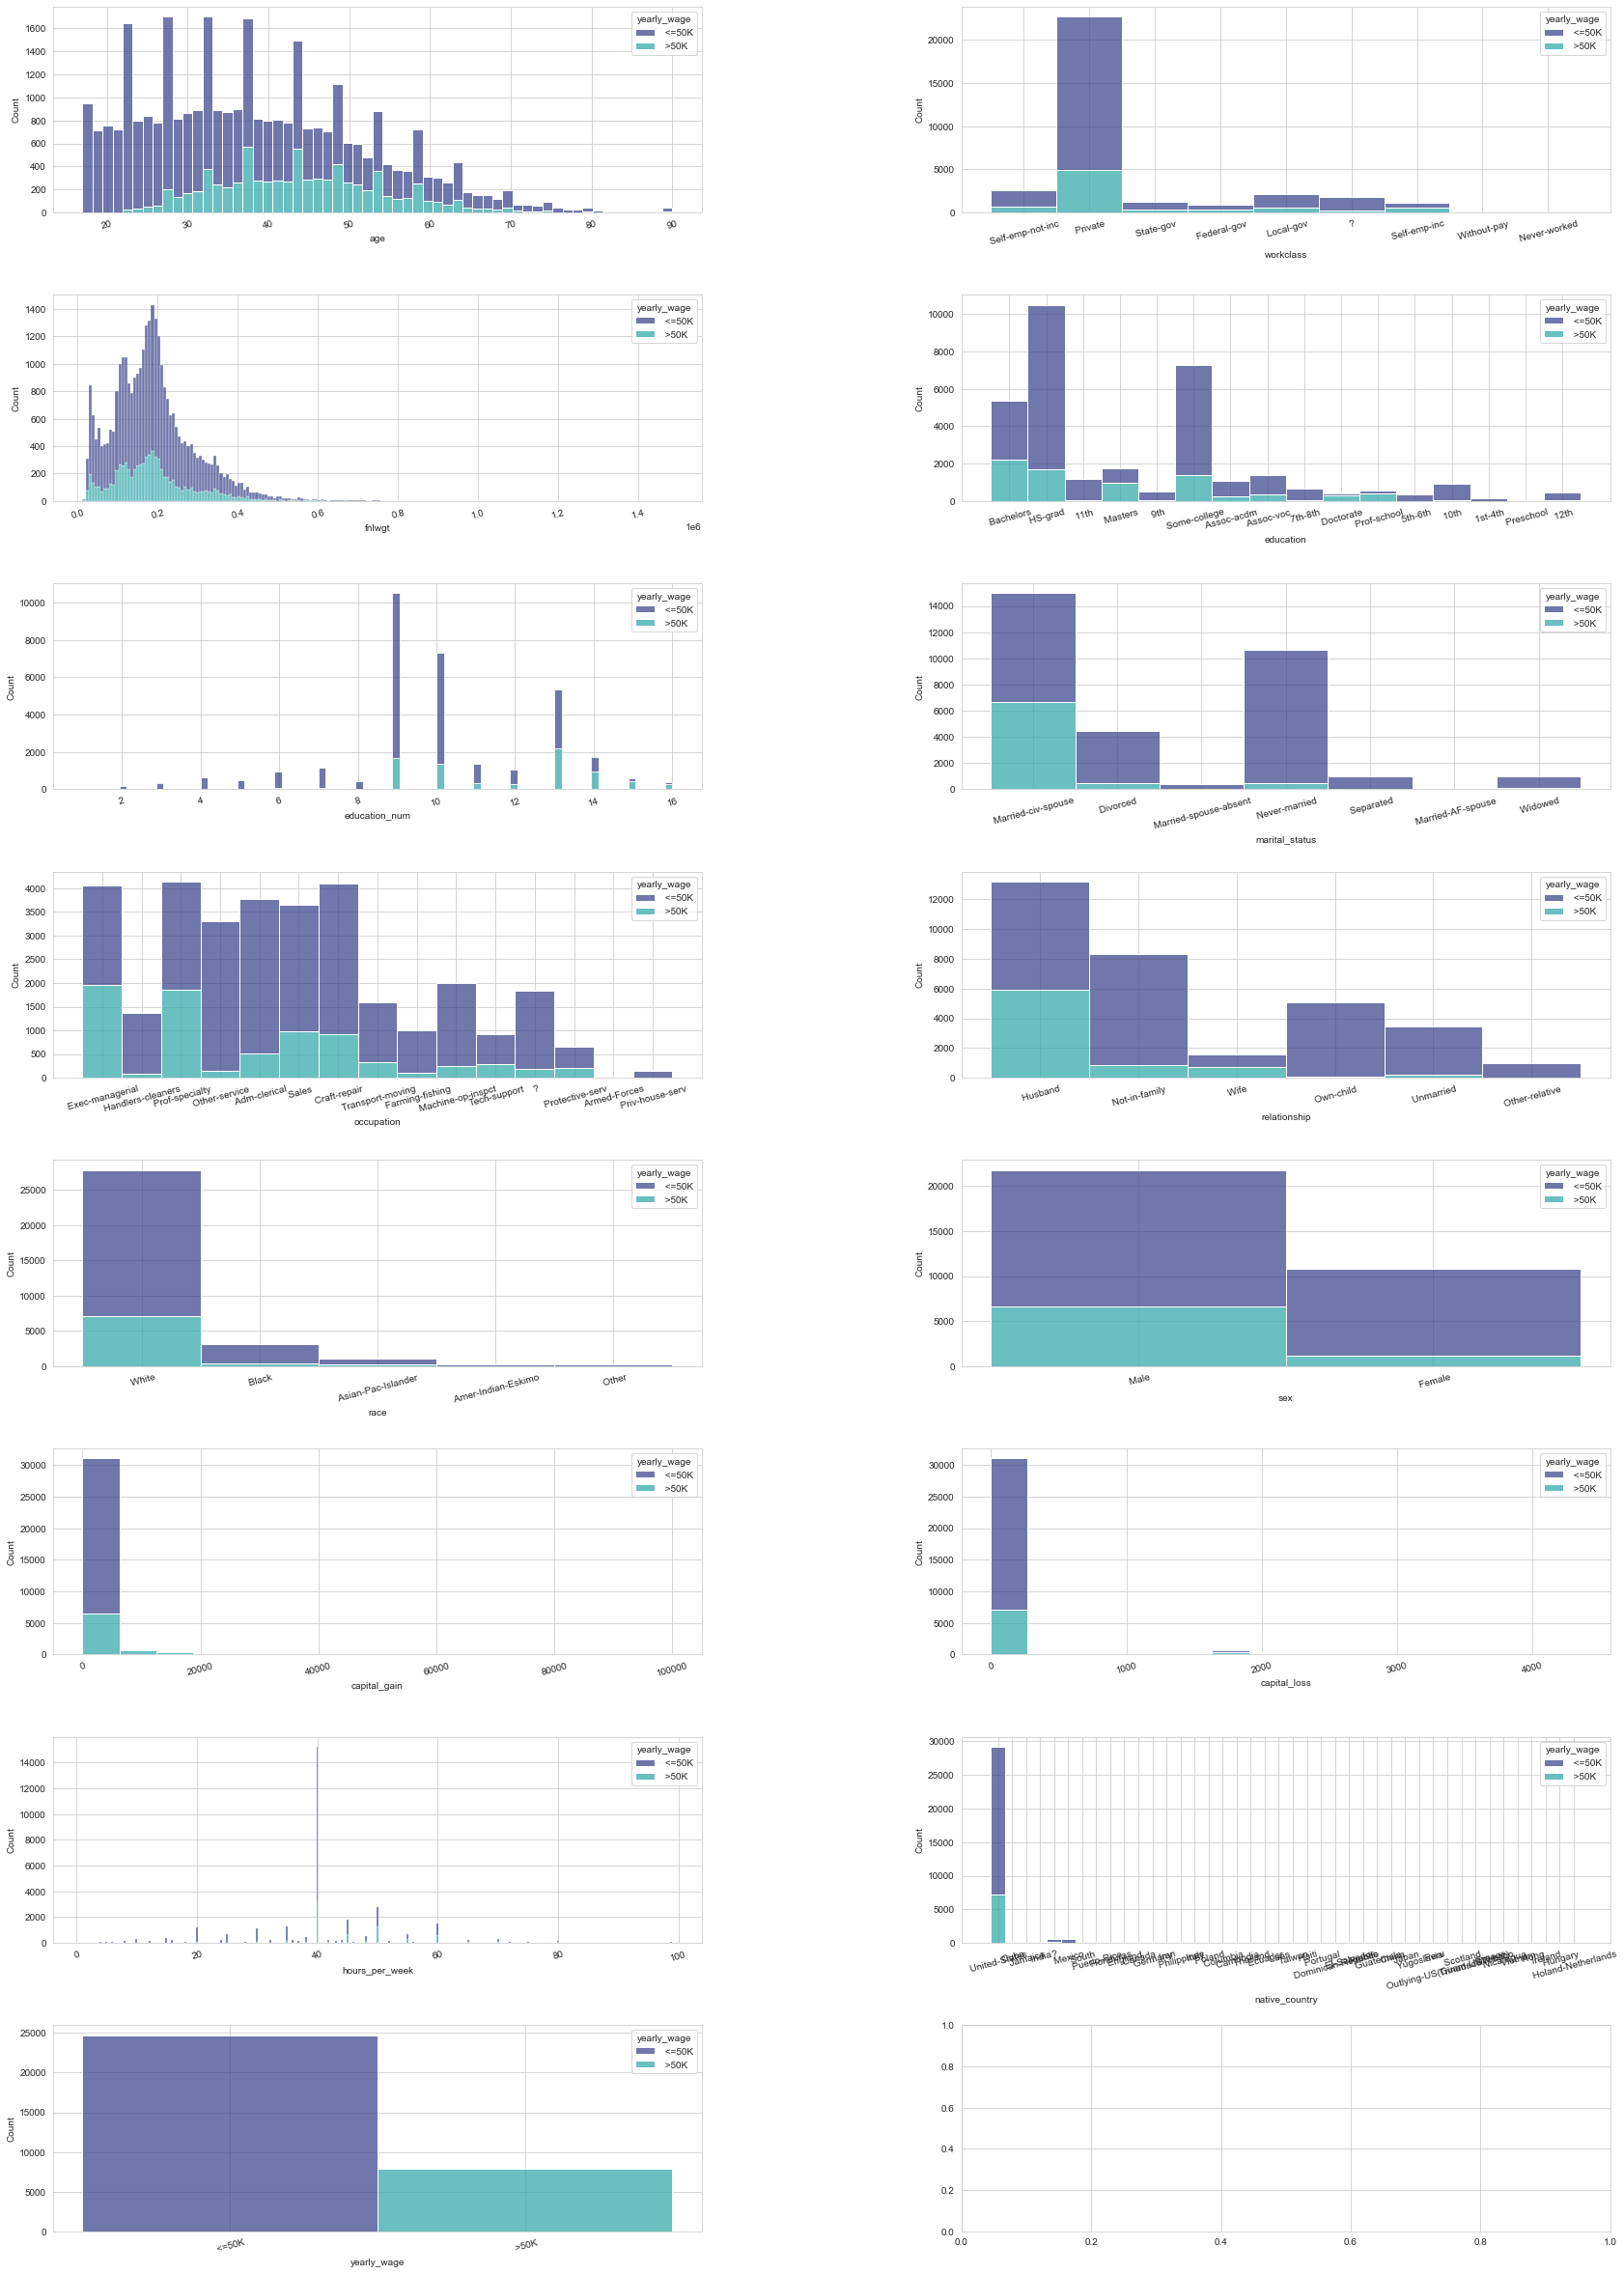

In [71]:
fig,axs = plt.subplots(8,2,figsize=(28,40)); 
cols = wage_train.columns

for i,ax in zip(cols,axs.ravel()):
  sns.histplot(data = wage_train, x = i, hue = 'yearly_wage', ax = ax, 
               palette = 'mako',multiple="stack")
  ax.tick_params(axis='x', rotation=15)
  ax.grid(True)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

Há muitos atributos categóricos. Para utilização de modelos de aprendizagem de máquina clássicos (KNN, SVM, Regressão Logística...) temos que fazer alguma transformação para variáveis numéricas. A mais clássica é o one-hot-encoding, mas há excesso de categorias. Vou fazer uma exploração para tentar simplificar as coisas.

Vou começar por ver quantas categorias há em cada atributo categórico para ver se faço uma fusão entre eles ou ordeno-os de maneira diferente.

In [72]:
cat_cols = wage_train.select_dtypes(include=object).columns

for i in cat_cols:
  print(i)
  print(len(wage_train[i].unique()))
  print(wage_train[i].unique())

workclass
9
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education
16
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital_status
7
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation
15
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
relationship
6
[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race
5
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex
2
[' Male' ' Female']
native_country
42
[' United-States' ' Cuba' '

Há muitas categorias. Vou juntar categorias em 'workclass' e 'marital_status'; colocar 'education' como um número ordenando a formação; colocar o 'native-country' por continente.

Vou verificar se os dados numéricos não são demasiadamente assimétricos (skewness). Valores abaixo ou perto de 1 são ok.

In [73]:
wage_train[['age','education_num','fnlwgt','capital_gain','capital_loss']].skew()

age               0.558738
education_num    -0.311630
fnlwgt            1.446972
capital_gain     11.953690
capital_loss      4.594549
dtype: float64

Vou manipular 'capital_gain' e 'capital_loss' aplicando logaritmo para diminuir a assimetria (skewness).

Aplico as manipulações de categorias e dados numéricos na função abaixo e aplico aos dados de treino e teste.

In [74]:
def prep(df):
  #workclass
  df['workclass'] = df['workclass'].replace([' Without-pay',' Never-worked'],'No pay')
  df['workclass'] = df['workclass'].replace([' Self-emp-not-inc',' Self-emp-inc'],'Self-emp')
  df['workclass'] = df['workclass'].replace([' State-gov',' Federal-gov',' Local-gov'],'gov')

  # education

  df['education'] = df['education'].replace([' 1st-4th', ' Preschool'],0)
  df['education'] = df['education'].replace([' 5th-6th', ' 7th-8th',' 9th', ' 10th', ' 11th',' 12th'],1)
  df['education'] = df['education'].replace([' HS-grad'],2)
  df['education'] = df['education'].replace([' Prof-school'],3)
  df['education'] = df['education'].replace([' Assoc-acdm',' Assoc-voc'],4)
  df['education'] = df['education'].replace(' Some-college',5)
  df['education'] = df['education'].replace(' Bachelors',6)
  df['education'] = df['education'].replace(' Masters',7)
  df['education'] = df['education'].replace(' Doctorate',8)

  #marital_status
  df['marital_status'] = df['marital_status'].replace([' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse'], 'Married') 
  df['marital_status'] = df['marital_status'].replace(' Separated', ' Divorced')

  # native_country
  df['native_country'] = df['native_country'].replace([' United-States',' Canada'],'North America')
  df['native_country'] = df['native_country'].replace([' England',' Germany',' Italy',' Poland',' Portugal',' France',' Yugoslavia',' Scotland',' Greece',' Ireland',' Hungary',' Holand-Netherlands'],'Europe')
  df['native_country'] = df['native_country'].replace([' Cuba',' Jamaica',' Mexico',' Puerto-Rico', ' Honduras',' Columbia',' Ecuador',' Haiti',' Dominican-Republic',' El-Salvador',' Guatemala',' Peru',' Outlying-US(Guam-USVI-etc)',' Trinadad&Tobago',' Nicaragua'],'Latin America')
  df['native_country'] = df['native_country'].replace([' India',' South',' Iran', ' Philippines',' Cambodia', ' Thailand', ' Laos', ' Taiwan',' China', ' Japan', ' Vietnam', ' Hong'],'Asia')

  # hours_per_week
  bins = [0,20,40,60,df['hours_per_week'].max()]
  labels = ['Half-time','Full-Time','Extra-Time','Workaholic']
  df['hours_per_week'] = pd.cut(df['hours_per_week'], bins=bins, labels=labels, include_lowest=True).astype('object')

  #yearly_wage
  if 'yearly_wage' in df.columns:
    df['yearly_wage'] = df['yearly_wage'].replace([' <=50K',' >50K'],[0,1])
    df.rename(columns = {'yearly_wage':'Response'}, inplace = True)

  # Skewness capital_gain e capital_loss
  df.capital_gain = df['capital_gain'].apply(lambda i: np.log(i) if i > 0 else 0)
  df.capital_loss = df['capital_loss'].apply(lambda i: np.log(i) if i > 0 else 0)

  return df

wage_train = prep(wage_train)
wage_test = prep(wage_test)



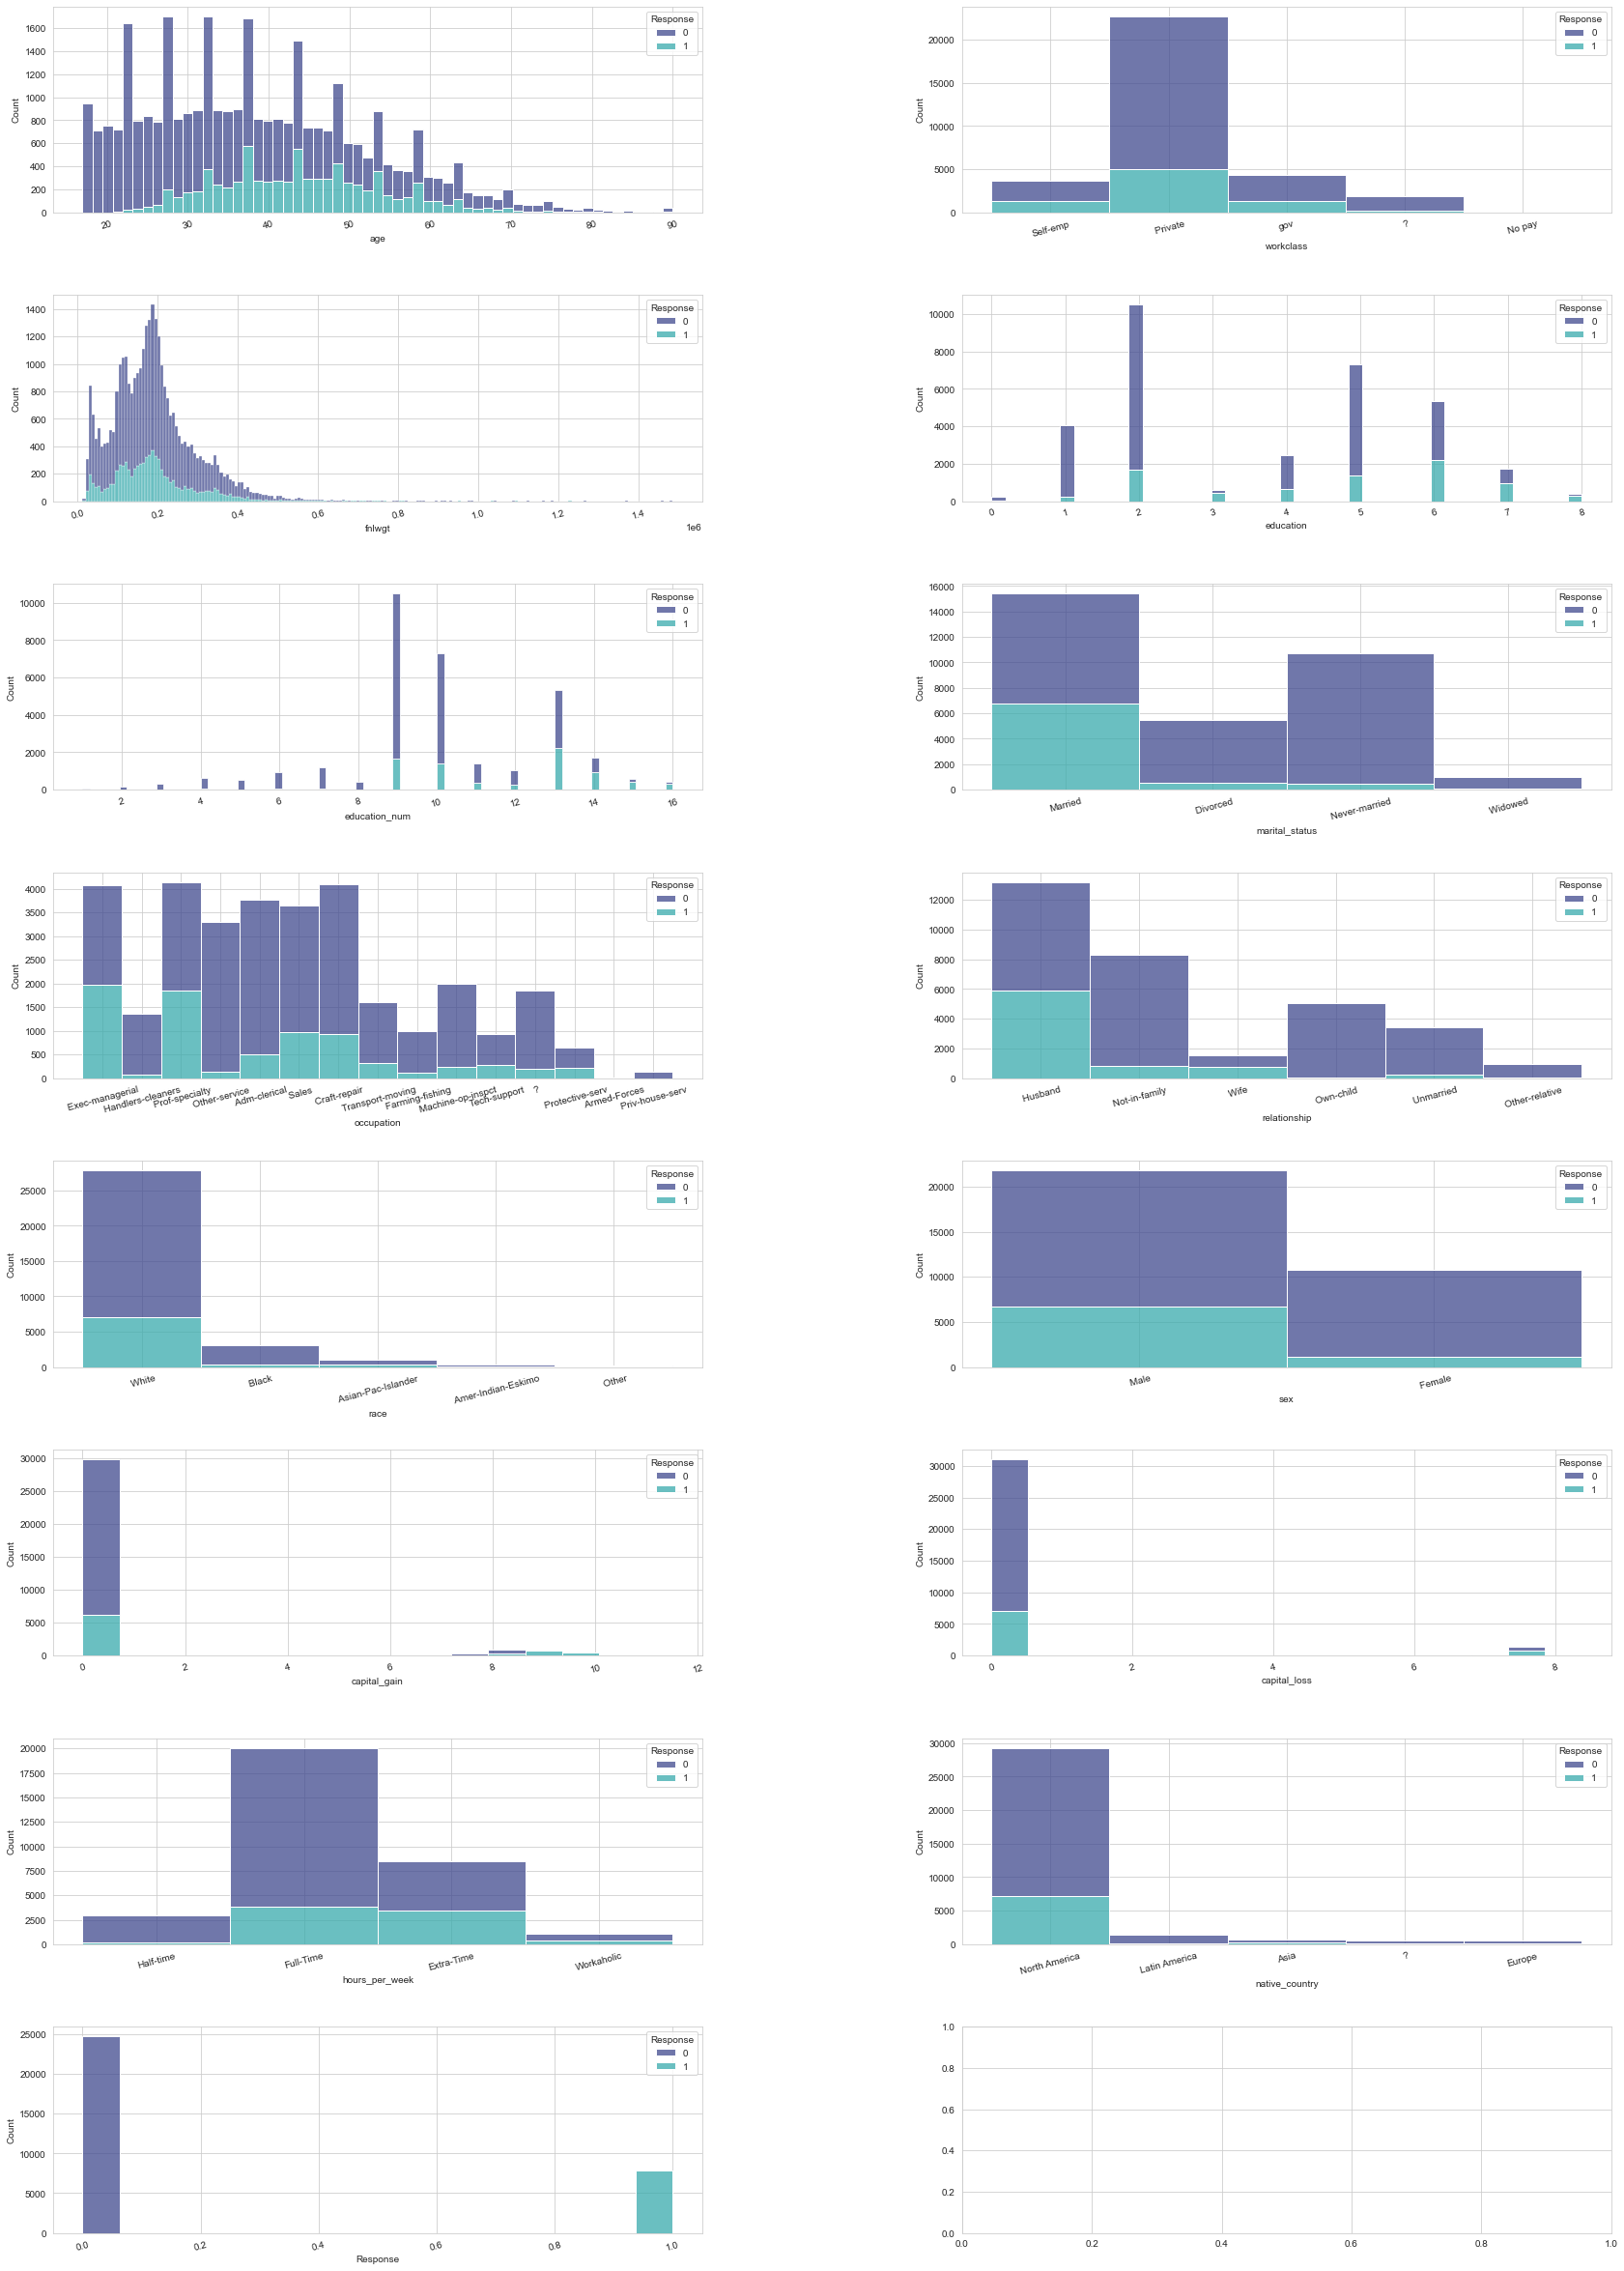

In [75]:
fig,axs = plt.subplots(8,2,figsize=(28,40))
cols = wage_train.columns

for i,ax in zip(cols,axs.ravel()):
  sns.histplot(data = wage_train, x = i, hue = 'Response', ax = ax, 
               palette = 'mako',multiple="stack")
  ax.tick_params(axis='x', rotation=15)
  ax.grid(True)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# Pré-Processamento

## One hot encoding

Como há atributos categóricos (e muitos), precisamos utilizar alguma transformação para convertê-los em variáveis numéricas. Algumas técnicas não precisam disso, como o Random Forest, mas outras (SVM's, KNN, Regressão Logística) precisam.

In [76]:
from pandas.core.indexes import category
from seaborn import categorical
def hotapplyer (df):
  ndf = df.copy()
  enc = OneHotEncoder(sparse = False)
  cat_cols = ndf.select_dtypes(include=[object]).columns
  for i in cat_cols:
    cats = ndf[i].unique()
    ndf[cats] = enc.fit_transform(ndf[[i]])
    ndf.drop(columns = [i],inplace=True)

  return ndf

enc_wage_train = hotapplyer(wage_train)
enc_wage_test = hotapplyer(wage_test)

In [77]:
wage_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'Response'],
      dtype='object')

In [78]:
enc_wage_train.columns

Index(['age', 'fnlwgt', 'education', 'education_num', 'capital_gain',
       'capital_loss', 'Response', 'Self-emp', ' Private', 'gov', ' ?',
       'No pay', 'Married', ' Divorced', ' Never-married', ' Widowed',
       ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', ' Husband', ' Not-in-family', ' Wife', ' Own-child',
       ' Unmarried', ' Other-relative', ' White', ' Black',
       ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other', ' Male',
       ' Female', 'Half-time', 'Full-Time', 'Extra-Time', 'Workaholic',
       'North America', 'Latin America', 'Asia', 'Europe'],
      dtype='object')

Eu vou colocar o atributo target como sendo a primeira coluna e eliminar 'Male', sendo que ele é totalmente complementar a 'Female' (ter esses dois atributos não muda nada porque não adicionam informação).

In [79]:
enc_wage_train.insert(0,'Response',enc_wage_train.pop('Response'))
enc_wage_train.drop(columns = ' Male', inplace = True)

enc_wage_test.drop(columns =' Male', inplace = True)

## Seleção de atributos: Correlação e Fator de Importância

É importante fazer uma seleção dos atributos que vão compor o modelo preditivo. Atributos que não ajudam a predizer a variável resposta podem atrapalhar ao invés de ajudar. Vou utilizar duas técnicas simples para a seleção: correlação e fator de importância.

A correlação nos ajuda a ver se atributos:
 - trazem informações novas (não são correlacionados entre si); 
 - e se ajudam a definir ou não a variável resposta (correlação entre o atributos e a variável resposta).

Atributos que tem módulo de correlação alta entre si não trazem informação suplementar. Um deles pode ser deletado. É o caso de 'Male' e 'Female', que tem correlação de -1. Só precisamos manter um desses atributos. Atributos que tem baixa correlação - também em módulo - com a variável resposta podem atrapalhar o modelo.   

O fator de importância é um método resultante de uma regressão. Consegue-se calcular a importância de um atributo na predição de um outro atributo (nesse caso, a variável resposta). 


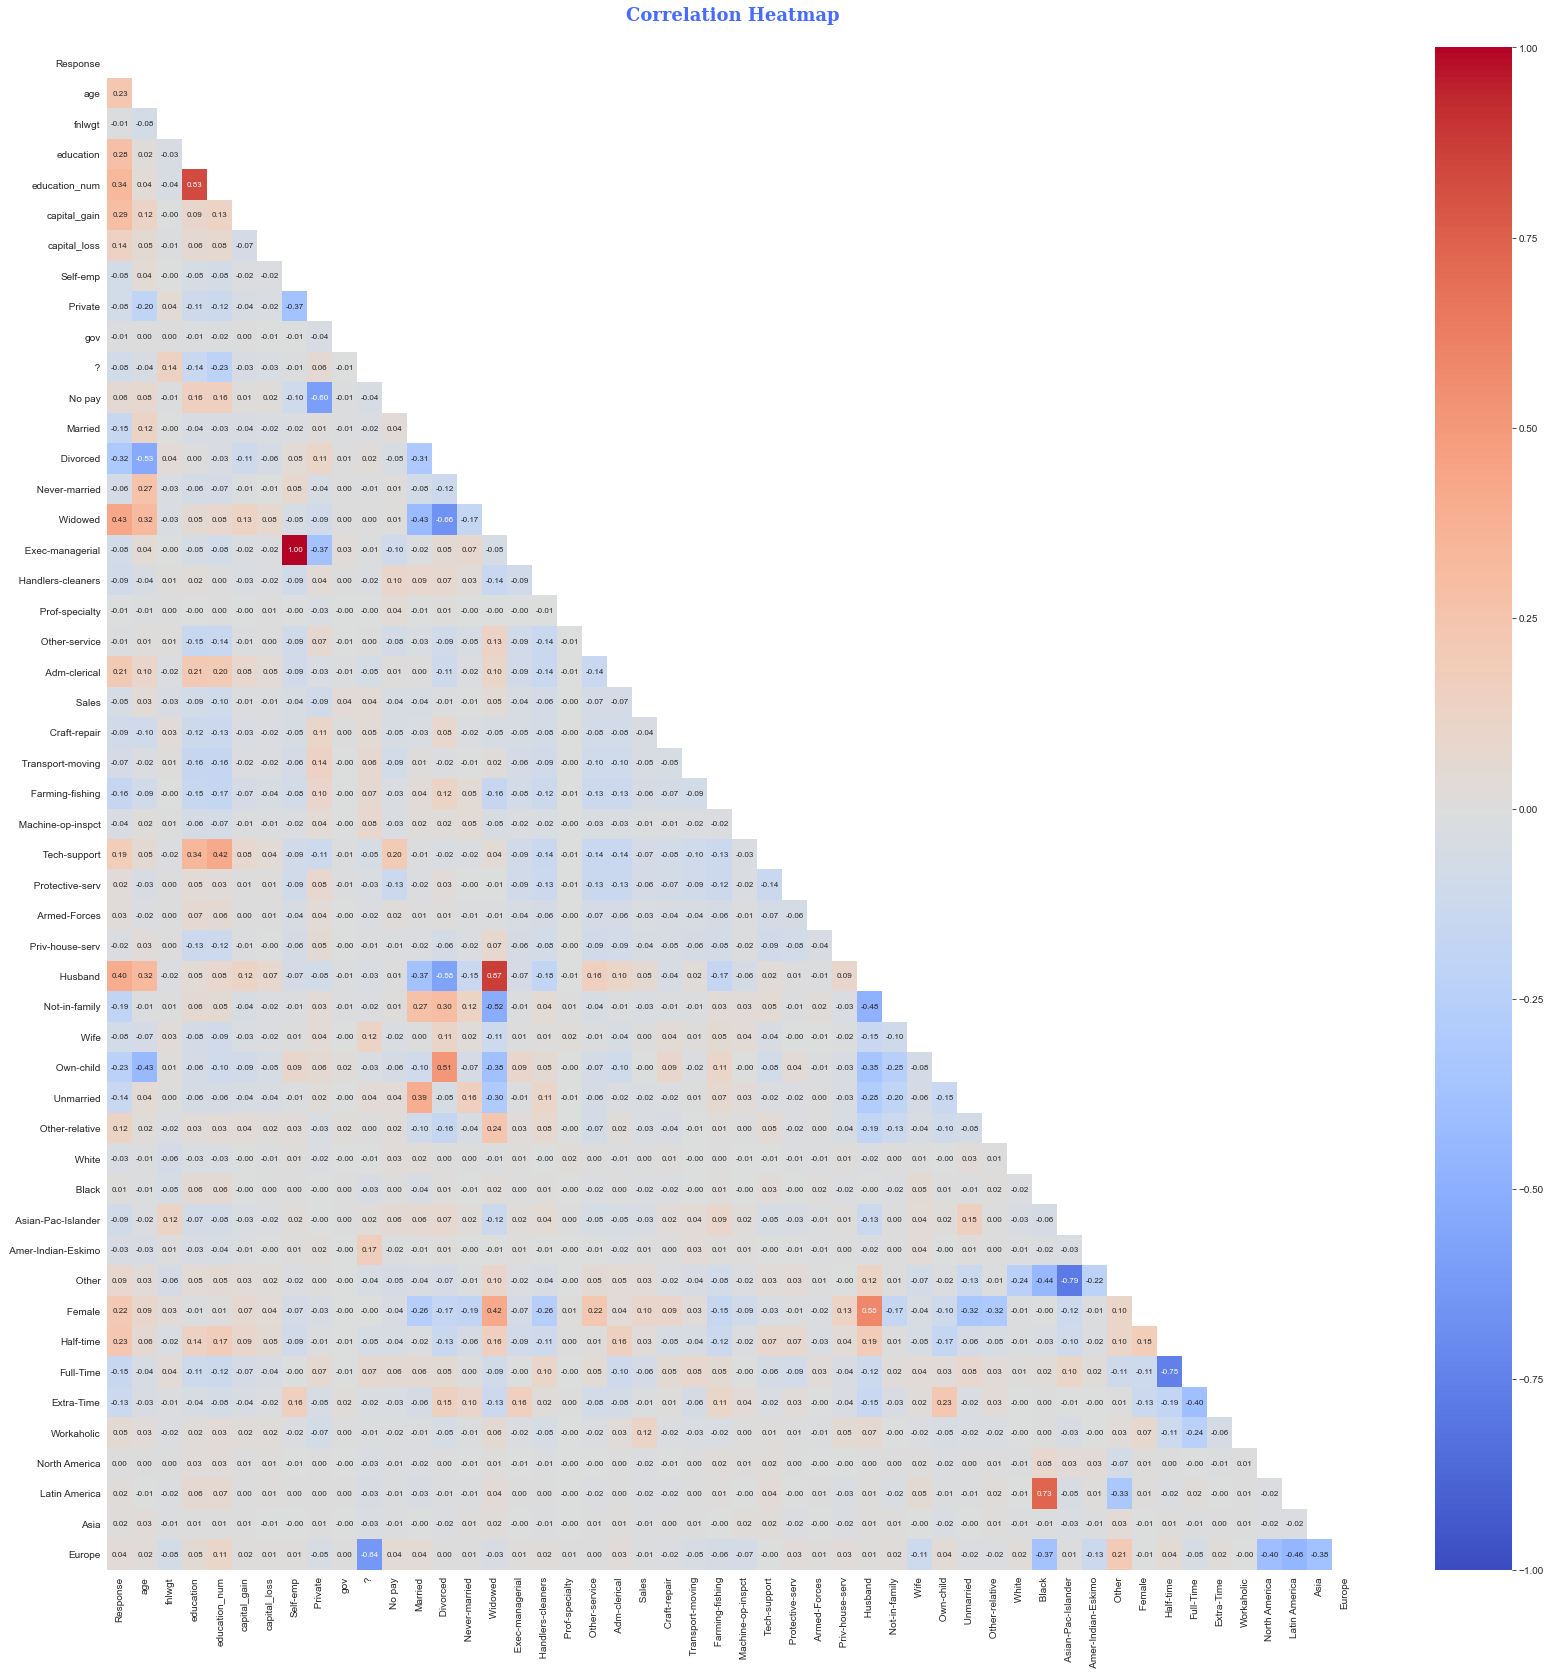

In [80]:
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

corr = enc_wage_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(28,28))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, 
                 center=0, 
                 cmap="coolwarm")
plt.title(f"Correlation Heatmap\n", 
          fontdict=font_title)
plt.show()

In [81]:
print ('Atributos com correlação mais negativa com a variável Resposta')
print(corr['Response'].sort_values(ascending=True)[0:5])

print ('Atributos com correlação mais positiva com a variável Resposta')
print(corr['Response'].sort_values(ascending=False)[0:6])

Atributos com correlação mais negativa com a variável Resposta
 Divorced          -0.318427
 Own-child         -0.228541
 Not-in-family     -0.188477
 Farming-fishing   -0.156355
Full-Time          -0.153377
Name: Response, dtype: float64
Atributos com correlação mais positiva com a variável Resposta
Response         1.000000
 Widowed         0.434935
 Husband         0.401027
education_num    0.335182
capital_gain     0.289554
education        0.278760
Name: Response, dtype: float64


Pelo que vemos, ser divorciado, adotado, não ter família, trabalhar em fazenda/pescador e ser casado contribuem negativamente para a renda. Já ser viúvo, marido e alto valor em anos de educação, ganho de capital e diploma elevado contribuem positivamente para que a renda seja superior a $50k. Essas variáveis precisam fazer parte da formação do modelo.

Complementarmente, vou utilizar uma regressão via Random Forest para extrair a importância dos atributos na predição da variável resposta.

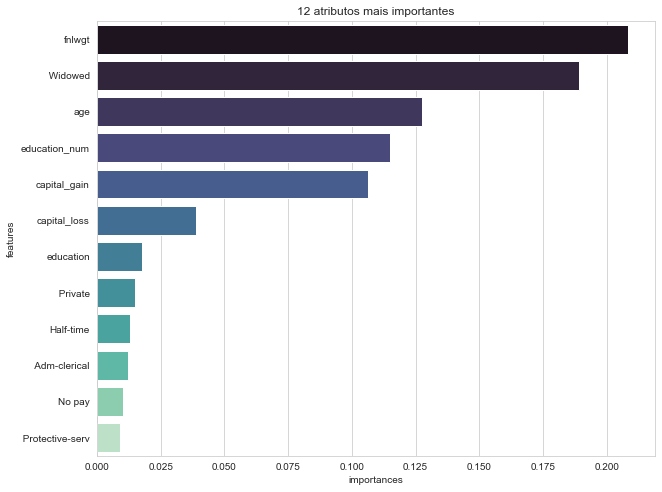

In [82]:
cols = enc_wage_train.columns.drop('Response')
model = RandomForestRegressor(n_estimators=100,max_depth=50)
model.fit(enc_wage_train[cols],enc_wage_train.Response)
features = cols
importances = model.feature_importances_
rfc_imp = pd.DataFrame()
rfc_imp['features'] = features;rfc_imp['importances'] = importances
plt.figure(figsize=(10, 8));ax1 = plt.subplot(1,1,1)
sns.barplot(data = rfc_imp.sort_values(by=['importances'],ascending=False)[0:12], 
            x='importances',y='features',ax=ax1,palette = 'mako')
plt.title('12 atributos mais importantes')

rf_cols = rfc_imp.sort_values(by=['importances'],ascending=False)[0:12]

In [110]:
rf_cols = rfc_imp.sort_values(by=['importances'],ascending=False)[0:12].features.to_list()
corr_cols = corr['Response'].sort_values(ascending=True)[0:5].index.to_list() +\
            corr['Response'].sort_values(ascending=False)[1:6].index.to_list()
selected_cols_model = list(set(corr_cols+rf_cols))

print(str(len(cols_model)) + ' atributos selecionados:')
selected_cols_model

18 atributos selecionados:


[' Farming-fishing',
 ' Not-in-family',
 'capital_gain',
 ' Husband',
 'capital_loss',
 ' Private',
 'Full-Time',
 'Half-time',
 ' Divorced',
 'No pay',
 ' Own-child',
 ' Widowed',
 ' Adm-clerical',
 'education',
 'age',
 'fnlwgt',
 'education_num',
 ' Protective-serv']

In [84]:
X = enc_wage_train[selected_cols_model].copy()
Y = enc_wage_train.Response.copy()

Selecionei 18 atributos para o treinamento dos modelos preditivos. Esses estão entre os 10 atributos com maior correlação com a variável resposta e/ou os 12 atributos que possuem a maior importância segundo regressão via Random Forest. 

# Modelos

## Balanceamento

Nota-se que a variável resposta é desbalanceada havendo muito mais amostras cuja renda anual é menor que 50K do que maior que 50K. Idealmente, deveríamos ter um dataset balanceado.

Há técnicas de oversampling como SMOTE e ADASYN que criam amostras artificiais, aumentando as amostras que possuem menos amostras. Isso aumenta o número de amostras. Há também técnicas de undersampling, em que é feita uma seleção aleatória controlada de amostras que possuem mais amostras. Isso reduz o tamanho do dataset.

Ambas as estratégias possuem desvantagens - criação de amostras artificiais ou a redução do dataset - que podem prejudicar o treinamento do modelo. Entretanto, não resolver esse desbalanceamento faz com que o modelo aprenda muito melhor, ou quase apenas, como classificar a classe mais numerosa em detrimento das outras. 

Vou utilizar o SMOTE abaixo.

Text(0.5, 1.0, 'Distribuição da Variável Resposta')

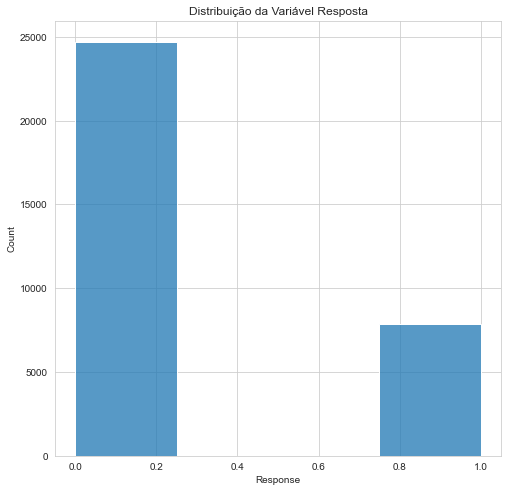

In [85]:
plt.figure(figsize=(8,8));ax1 = plt.subplot(1,1,1)

sns.histplot(data = enc_wage_train.Response,stat ='count' , ax = ax1, 
               palette = 'mako',multiple="stack",bins = 4)
plt.title('Distribuição da Variável Resposta')

Text(0.5, 1.0, 'Distribuição da Variável Resposta')

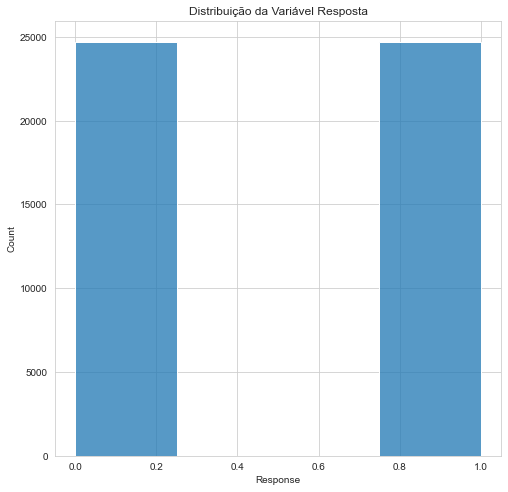

In [86]:
os = SMOTE(k_neighbors = 9, random_state=0, n_jobs=8)

X_backup = X.copy(); Y_backup = Y.copy()
X,Y = os.fit_resample(X,Y)

plt.figure(figsize=(8,8));ax1 = plt.subplot(1,1,1)
sns.histplot(data = Y,stat ='count' , ax = ax1, 
               palette = 'mako',multiple="stack",bins = 4)
plt.title('Distribuição da Variável Resposta')

## Preparação para Holdout

Além de uma validação cruzada, quero utilizar o holdout para avaliar os modelos e selecionar o melhor. Abaixo separo 30 por cento das amostras para fazer um teste de avaliação. Os outros 70% serão usados para treinar o modelo com os melhores hyperparâmetros encontrado na validação cruzada. Nesses 70%, testei alpicando o SMOTE e sem. O melhor resultado ocorreu sem o SMOTE. Isso é reflexo da dificuldade de criação de amostras artificiais fidedignas e a consequência será que o modelo terá mais dificuldade em conseguir prever a classe minoritária. 

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X_backup, Y_backup.squeeze(), test_size=0.2)

## SVM

SVM's usa a técnica de criação de um suporte para promover a separação entre as categorias. O suporte é o hiperplano que "melhor" separa as diferentes categorias da variável resposta. Esse "melhor" é no sentido de otimizar ou obter a maior margem (distância) entre os vetores de suporte - pontos mais próximos da borda entre categorias. A figura abaixo exemplifica a técnica.

Como essa técnica usa distância, precisamos preprocessar os dados de forma a normalizarmo-los de alguma forma.



![picture](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)

Abaixo criei uma função que aplica validação cruzada. O intuito é usá-la para definir os melhore hyperparâmetros.

In [88]:
def appSVM(C,kernel,degree,X,y):
  pipeSVM = make_pipeline(StandardScaler(), SVC(C=C,kernel=kernel,
                                                    degree = degree,
                                                    random_state=0)) 
  predictions = cross_val_predict(pipeSVM,X,y.squeeze(),cv=5, n_jobs = 8)
  accuracy = accuracy_score(y,predictions)
  f1 = f1_score(y,predictions,average=None)
  return accuracy, f1[0],f1[1]

Abaixo faço uma varredura entre alguns hyperparâmetros para definir os que mais se adequam. Posteriormente, criar-se-á um modelo com esses para aplicação de Holdout. 

--- 0.0 seconds ---
C =  3 ; kernel =  rbf ; degree =  1
--- 108.34675407409668 seconds ---
C =  5 ; kernel =  rbf ; degree =  1
--- 222.16253089904785 seconds ---
C =  11 ; kernel =  rbf ; degree =  1
--- 352.50210428237915 seconds ---
C =  15 ; kernel =  rbf ; degree =  1
--- 490.76950335502625 seconds ---
C =  21 ; kernel =  rbf ; degree =  1
--- 638.0418322086334 seconds ---


<AxesSubplot:xlabel='C', ylabel='f1_1'>

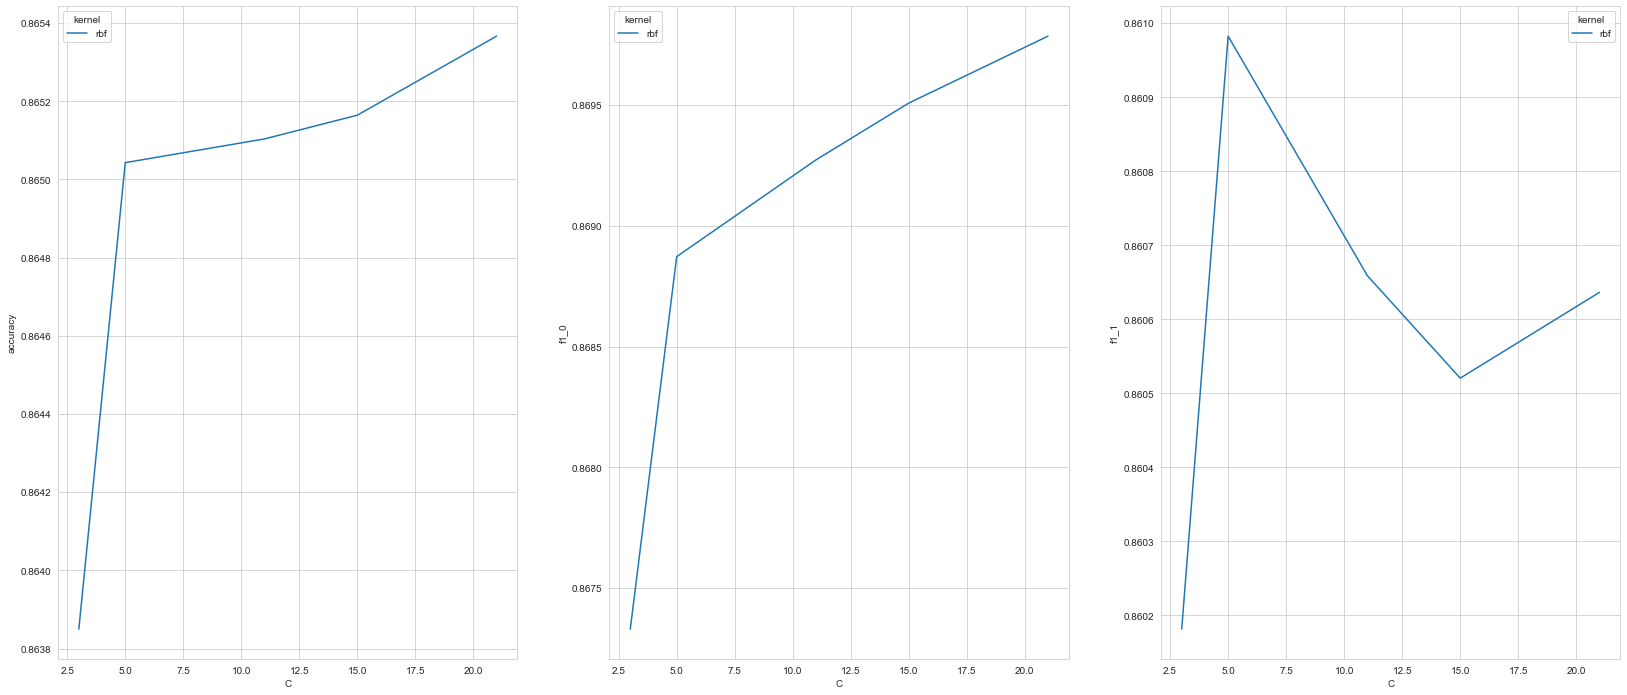

In [89]:
start_time = time.time()

print("--- %s seconds ---" % (time.time() - start_time))


cols=['C','kernel','degree','accuracy','f1_0','f1_1']
SVM_results = pd.DataFrame(columns=cols)

for C in [3,5,11,15,21]:
  for kernel in ['rbf']:
    for degree in [1]:
      print('C = ',C,'; kernel = ',kernel,'; degree = ',degree)
      accuracy, f1_0,f1_1 = appSVM(C,kernel,degree,X,Y)
      print("--- %s seconds ---" % (time.time() - start_time))  
      SVM_results = pd.concat([
                               SVM_results,
                               pd.DataFrame([[C,kernel,degree,accuracy,f1_0,f1_1]],
                                            columns=cols)
                                  ])
      
SVM_results.reset_index(drop=True,inplace=True)
SVM_results.drop(SVM_results[(SVM_results.kernel!='poly') & 
                             (SVM_results.degree==5)].index,inplace=True)


fig,axs = plt.subplots(1,3,figsize=(28, 12))
sns.lineplot(data=SVM_results,y='accuracy',x='C',hue='kernel',ax=axs[0])
sns.lineplot(data=SVM_results,y='f1_0',x='C',hue='kernel',ax=axs[1])
sns.lineplot(data=SVM_results,y='f1_1',x='C',hue='kernel',ax=axs[2])

Na validação cruzada, os melhores resultados foram obtidos com C=21 e kernel=rbf.

In [90]:
svm_params = {'C':21,'kernel':'rbf'}

Faço uma função para plot de matriz de confusão que será usada em todos os testes de Holdout.

In [91]:
def print_confMat (y,predictions,graph):
  cm = confusion_matrix(y, predictions)
  accuracy = accuracy_score(y,predictions)
  f1 = f1_score(y,predictions,average=None)
  text = 'Accuracy = '+"{:.2f}".format(accuracy)+'; '+'f1_0 = '+"{:.2f}".format(f1[0])+'; '+'f1_1 = '+"{:.2f}".format(f1[1])+'; '
  if graph:
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.grid(False); ax.set_title(text)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues,ax=ax)
    plt.show()
  else: return accuracy,f1[0],f1[1]

Fazemos um Holdout para ver a performance do modelo. Guardamos esse resultado em mente para comparar com os outos modelos.

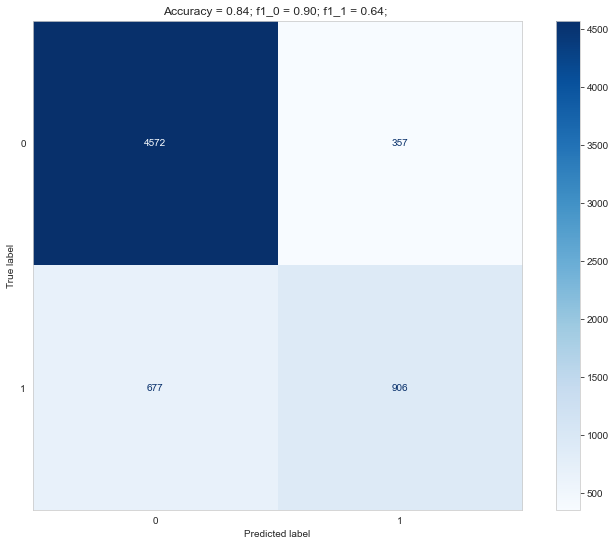

In [92]:
pipeSVM = make_pipeline(StandardScaler(),
                          SVC(**svm_params,random_state=0)) 

SVM_model = pipeSVM.fit(X_train,y_train)
predictions = SVM_model.predict(X_test)


print_confMat (y_test,predictions,graph=1)


## Random Forest 

Random Forest é um método de aprendizado conjunto para classificação, regressão e outras tarefas que opera construindo uma infinidade de árvores de decisão em tempo de treinamento. Para tarefas de classificação, a saída da Random Forest é a classe selecionada pela maioria das árvores. Para tarefas de regressão, a previsão média ou média das árvores individuais é retornada.

A criação das árvores de decisão usa uma função para determinação da homogeneidade de classes nas amostras nos ramos. Essa função pode ser Gini ou Entropia. Além dessa, a quantidade de árvores que compõem a floresta pode ser averiguada. Não há necessidade de normalização dos dados porque não usamos nenhuma noção de distância entre amostras.

![picture](https://c.mql5.com/2/33/image1__1.png)

Abaixo faço uma varredura entre alguns hyperparâmetros para definir os que mais se adequam. Posteriormente, criar-se-á um modelo com esses para aplicação de Holdout. 

n_estimators=  20 criterion=  gini
--- 0.0009980201721191406 seconds ---
n_estimators=  20 criterion=  entropy
--- 5.799896955490112 seconds ---
n_estimators=  50 criterion=  gini
--- 11.63071322441101 seconds ---
n_estimators=  50 criterion=  entropy
--- 20.65082049369812 seconds ---
n_estimators=  80 criterion=  gini
--- 30.770434141159058 seconds ---
n_estimators=  80 criterion=  entropy
--- 43.74857711791992 seconds ---
n_estimators=  100 criterion=  gini
--- 58.601770639419556 seconds ---
n_estimators=  100 criterion=  entropy
--- 74.49384951591492 seconds ---
n_estimators=  200 criterion=  gini
--- 92.53522682189941 seconds ---
n_estimators=  200 criterion=  entropy
--- 125.77312350273132 seconds ---
n_estimators=  300 criterion=  gini
--- 161.13224029541016 seconds ---
n_estimators=  300 criterion=  entropy
--- 207.9035234451294 seconds ---
n_estimators=  500 criterion=  gini
--- 259.52326250076294 seconds ---
n_estimators=  500 criterion=  entropy
--- 331.25833535194397 seconds

<AxesSubplot:xlabel='n_estimators', ylabel='f1_1'>

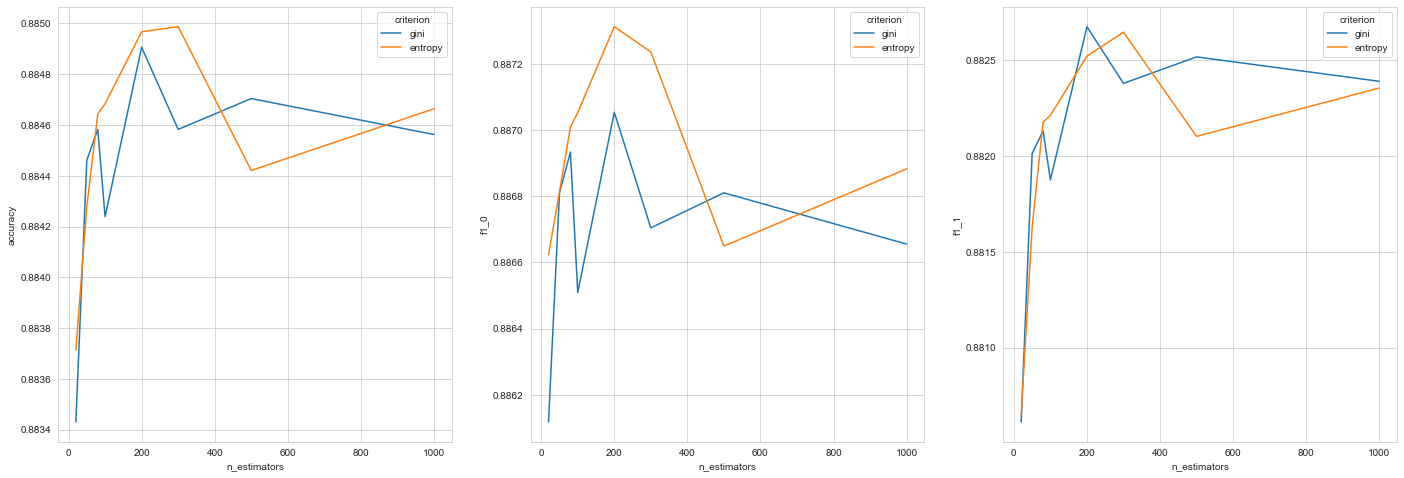

In [93]:
start_time = time.time()

cols=['n_estimators','criterion','accuracy','f1_0','f1_1']
rfc_results = pd.DataFrame(columns=cols)

for n in [20,50,80,100,200,300,500,1000]:
  for criterion in ['gini','entropy']:
    print ('n_estimators= ',n,'criterion= ',criterion)
    rfc = RandomForestClassifier(n_estimators=n,
                                 criterion=criterion,
                                 verbose=0,
                                 random_state=1,
                                 n_jobs=8)
    print("--- %s seconds ---" % (time.time() - start_time)) 
    predictions = cross_val_predict(rfc,X,Y.squeeze(),cv=10)
    accuracy, f1_0,f1_1 = print_confMat (Y, predictions,graph=0)
    rfc_results =pd.concat([
                                        rfc_results,
                                        pd.DataFrame([
                                            [n,criterion,accuracy,f1_0,f1_1]],
                                            columns=cols)
                                      ])
                                                                        
    
rfc_results.reset_index(drop=True,inplace=True)

fig,axs = plt.subplots(1,3,figsize=(24, 8))

sns.lineplot(data=rfc_results,y='accuracy',x='n_estimators',hue='criterion',ax=axs[0])
sns.lineplot(data=rfc_results,y='f1_0',x='n_estimators',hue='criterion',ax=axs[1])
sns.lineplot(data=rfc_results,y='f1_1',x='n_estimators',hue='criterion',ax=axs[2])

Na validação cruzada, os melhores resultados foram obtidos com n_estimators=100 e criterion=entropy.

In [94]:
rfc_params = {'n_estimators':100,
              'criterion':'entropy',
              'verbose':0,
              'random_state':1,
              'n_jobs':8}

Fazemos um Holdout para ver a performance do modelo. Guardamos esse resultado em mente para comparar com os outos modelos.

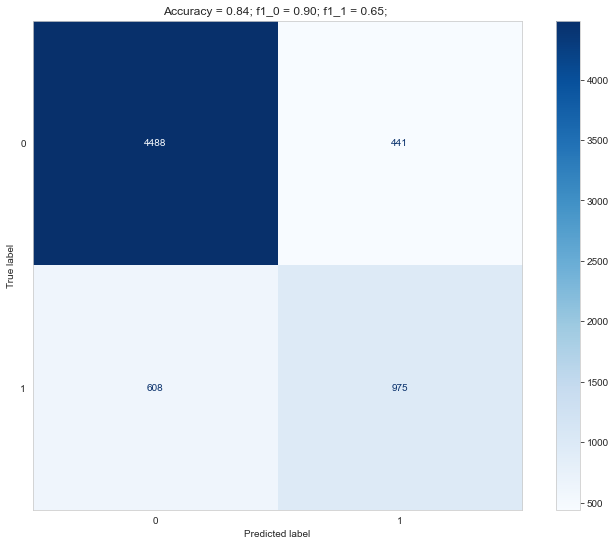

In [95]:
rfc = RandomForestClassifier(**rfc_params)

rfc_model = rfc.fit(X_train,y_train)
predictions = rfc_model.predict(X_test)

print_confMat (y_test,predictions,graph=1)
                                 

## XGBoost

Do próprio site do XGBoost (https://xgboost.readthedocs.io/en/stable/)
*XGBoost é uma biblioteca otimizada de aumento de gradiente distribuída projetada para ser altamente eficiente, flexível e portátil. Ele implementa algoritmos de aprendizado de máquina sob a estrutura Gradient Boosting. O XGBoost fornece um reforço de árvore paralela (também conhecido como GBDT, GBM) que resolve muitos problemas de ciência de dados de maneira rápida e precisa. O mesmo código roda nos principais ambientes distribuídos (Hadoop, SGE, MPI) e pode resolver problemas além de bilhões de exemplos.*

Ele utiliza árvores de decisão como base para o boosting, então, novamente, não precisamos fazer uma normalização dos dados.

![picture](https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png)

In [96]:
xgb.set_config(verbosity=0)

Abaixo eu faço um `GridSearchCV`(no SVM e no Random Forest eu fiz isso "na mão") para encontrar os melhores hyperparâmetros para o modelo.

In [97]:
xgb_params = {'learning_rate':[0.02, 0.05,0.1],
              'max_depth': [3,5,10],
              'n_estimators':[1000,2000]}

xgb_search = GridSearchCV(estimator=xgb.XGBClassifier(objective = 'binary:logistic',
                                                      n_jobs = 8),
                                param_grid=xgb_params,
                                cv=2,
                                scoring='f1',
                                return_train_score=True,
                                verbose=2,
                                n_jobs=8
                         )

xgb_search.fit(X,Y.squeeze())

Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=8,
             param_grid={'learning_rate': [0.02, 0.05, 0.1],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [1000, 2000]},
             return_train_score=True, scoring='f1', verbose=2)

In [98]:
print(xgb_search.best_params_)
print(xgb_search.best_score_)

{'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 2000}
0.7893814242214956


Fazemos um Holdout para ver a performance do modelo. Guardamos esse resultado em mente para comparar com os outos modelos.

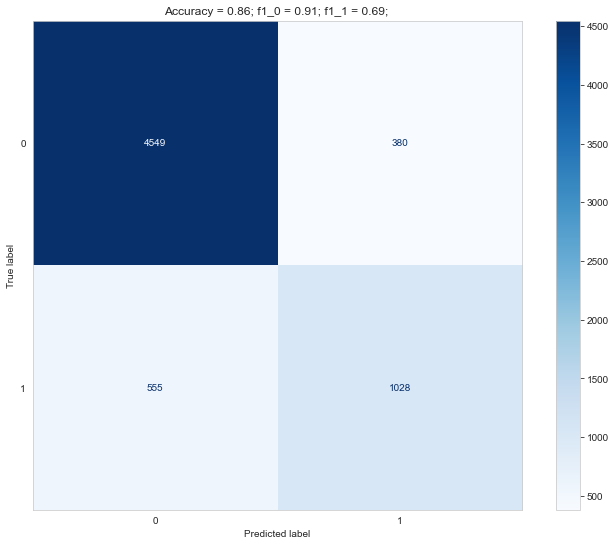

In [99]:
X_train,y_train = os.fit_resample(X_train,y_train)# Training data is oversampled
#the oversampling worked better for the xgboost

xgbc = xgb.XGBClassifier(**xgb_search.best_params_,
                  objective = 'binary:logistic',
                  n_jobs = 8)

xgb_model = xgbc.fit(X_train,y_train)
predictions = xgb_model.predict(X_test)

print_confMat (y_test,predictions,graph=1)


## Seleção e treinamento do melhor modelo

Comparando as matrizes de confusão aplicados ao Holdout vemos que o XGBoost obteve melhor resultados, principalmente na predição de renda anual maior que 50k (classe minoritária). Com base nisso, esse será o modelo escolhido. 

Agora ele será treinado com todo o dataset de treino com oversampling (vi que o oversampling funciona melhor para o xgboost). Após aplica-se ao dataset de teste. 

In [114]:
final_model = xgbc.fit(X,Y)
final_pred = final_model.predict(enc_wage_test[selected_cols_model])

In [119]:
predicted = pd.DataFrame(index = enc_wage_test.index)
predicted = predicted.rename_axis('rowNumber')
predicted['predictedValues'] = final_pred

predicted.to_csv('predicted.csv',index=True)

**Entrega**

*2 - Explique como você faria a previsão do salário a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?*

Estamos resolvendo um problema de classificação binária.
Creio que essa questão foi respondida o ao longo da implementação desse notebook. Em resumo:
    
    - tratei os dados brutos de forma a diminuir a quantidade de categorias em cada atributo;
    - apliquei transformação logaritmica para diminuir assimetria de 'capital_gain' e 'capital_loss';
    - apliquei `OneHotEncoder` para transformar dados categóricos em numéricos;
    - selecionei os atributos que se mostraram mais relevantes via correlação e fator de importância retirado de regressão Random Forest;
    - apliquei balanceamento de dados com técnica de oversampling, criando amostras artificiais para classe minoritária (renda superior a 50k);
    - avaliei modelo de classificação com técnica SVM:
        - apliquei tunning de hyperparâmetros em validação cruzada em dataset com oversampling;
        - apliquei Holdout em dataset sem oversampling;
    - avaliei modelo de classificação com técnica Random Forest:
        - apliquei tunning de hyperparâmetros em validação cruzada em dataset com oversampling;
        - apliquei Holdout em dataset sem oversampling;
    - avaliei modelo de classificação com técnica XGBoost:
        - apliquei tunning de hyperparâmetros em validação cruzada em dataset com oversampling;
        - apliquei Holdout em dataset com oversampling;
    - modelo criado foi o XGboost porque apresentou melhor acurária e melhor f1.
    
O XGboost é bastante aplicado na indústria e tem a vantagem de suportar treinamento em GPU (nesse caso não foi utilizado), coisa que o SKLearn não consegue. Como não usei GPU, o `GridSearchCV` levou mais tempo que o SVM e o Random Forest. Por ser baseado em árvores de decisão, não precisa de normalização dos dados. Ele pode ser sensível a outliers.
    
A acurácia é a quantidade de acertos que o modelo teve comparado com o total de previsão. No caso de datasets desbalanceados, se o modelo "chutar" sempre a classe maioritária, ele terá uma acurácia razoável. Por isso essa estatística não é suficiente no nosso caso. O f1 vem a complementar. O f1 depende do recall e da precisão (é um valor para cada classe) e por isso se torna interessante. Vimos que o XGBoost teve o melhor resultado tanto em acurária e f1 no Holdout.   